# urllib으로 크롤링하기

- url을 입력하여 작동하는 라이브러리로 통신을 통해 데이터를 주고받는 기능을 한다.
- 데이터를 받아오거나 다운로드할 수 있다
- urlerror을 통해 웹과 관련된 에러처리를 더욱 상세하게 할 수 있다.
- url parser를 통해 어떤 요소들이 url에 들어가있는지 확인할 수 있다

종류
> urlretrieve
>
> urlerror
>
> urlopen
>
> urlparser

## urllib.request 로 이미지 다운받기

### 1.urlretrieve

> url로 표시된 네트워크 정보를 파일로 저장할 수 있는 기능 (이미지 , html) 
>
> (filename, headers) 튜플로 반환한다
>
> ex file, header = req.urlretrieve(url, path)

##### 이미지저장

In [1]:
import urllib.request as req

In [2]:
#url 에 접근할 url주소를 담고, path에 저장할 경로와 파일명을 적으면 된다. 파일명만 적을 경우 현재 위치로 저장이 된다.

url = "http://blogfiles.naver.net/MjAyMDA0MTNfMTI2/MDAxNTg2NzYwNTAxNTU4.oERTsDgZxBIlS9nY5U2WFzGVimQ4sH00otaj6GT9lhog.E9T21GIDF7sRnKCtyXJj4EU4inEmczNwcGQLoSv7Faog.PNG.cheer506/%B8%B6%B4%EB%B8%AE_%B8%B6%C0%CE%C5%CF2.png"

path = "test1.jpg"

현재위치 조회

In [3]:
import os
os.getcwd()

'C:\\Users\\samsung\\Desktop\\크롤링기초'

In [4]:
file, header = req.urlretrieve(url, path)

In [5]:
print(file)

test1.jpg


In [6]:
print(header)

Date: Thu, 02 Jul 2020 07:52:40 GMT
Server: Apache
P3P: CP="ALL CURa ADMa DEVa TAIa OUR BUS IND PHY ONL UNI PUR FIN COM NAV INT DEM CNT STA POL HEA PRE LOC OTC"
Accept-Ranges: bytes
Last-Modified: Wed, 24 Jun 2020 05:52:56 GMT
Content-Length: 28658
Cache-Control: max-age=2592000
Content-Type: image/png
Age: 698385
Expires: Fri, 24 Jul 2020 05:52:56 GMT
Connection: close




##### html저장

In [7]:
url2 = "https://www.naver.com/"
path2 = "naver.html"

In [8]:
file2, header2 = req.urlretrieve(url2, path2)

이미지 저장과 html저장 내용 확인하기

In [9]:
print("----------------------------------------------------")
print(f"file name: {file}")
print("----------------------------------------------------")
print("Header Info :")
print(header)
print("----------------------------------------------------")
print(f"file name: {file2}")
print("----------------------------------------------------")
print("Header Info :")
print(header2)

----------------------------------------------------
file name: test1.jpg
----------------------------------------------------
Header Info :
Date: Thu, 02 Jul 2020 07:52:40 GMT
Server: Apache
P3P: CP="ALL CURa ADMa DEVa TAIa OUR BUS IND PHY ONL UNI PUR FIN COM NAV INT DEM CNT STA POL HEA PRE LOC OTC"
Accept-Ranges: bytes
Last-Modified: Wed, 24 Jun 2020 05:52:56 GMT
Content-Length: 28658
Cache-Control: max-age=2592000
Content-Type: image/png
Age: 698385
Expires: Fri, 24 Jul 2020 05:52:56 GMT
Connection: close


----------------------------------------------------
file name: naver.html
----------------------------------------------------
Header Info :
Server: NWS
Date: Thu, 02 Jul 2020 07:52:45 GMT
Content-Type: text/html; charset=UTF-8
Transfer-Encoding: chunked
Connection: close
Set-Cookie: PM_CK_loc=4f442a2af035a2c1fcd866e851beed48b90c3186a1525eac9f5ae3c8024a0c4f; Expires=Fri, 03 Jul 2020 07:52:45 GMT; Path=/; HttpOnly
Cache-Control: no-cache, no-store, must-revalidate
Pragma: no-cach

## 2.urlerror
> 크롤링에서 발생할 수 있는 에러처리를 할 수 있음
>
> 에러처리를 통해서 어떤 에러가 발생하였는지 파악하고 코드를 수정할 수 있음.
>
> URLError: 요청한 곳의 서버가 없거나 네트워크 연결이 없는 상황에서 발생
>
> HTTPError: HTTP응답에 있는 status에 따라서 상태를 반환시켜줌, status코드에 따라서 에러 유형이 다름
>
> 주의사항: URLError가 HTTPError도 잡기 때문에 HTTPError처리를 먼저 해줘야함


#### 1번 예제와 다르게 list에 넣고 for문을 통한 이미지 다운로드를 실시

##### (참고)기타에러

- ValueError

- IndexError

- ImportError

- Exception : 정의할 수 없는 에러

In [10]:
from urllib.error import URLError, HTTPError

In [11]:
url_list = ['http://blogfiles.naver.net/MjAyMDA0MTNfMTI2/MDAxNTg2NzYwNTAxNTU4.oERTsDgZxBIlS9nY5U2WFzGVimQ4sH00otaj6GT9lhog.E9T21GIDF7sRnKCtyXJj4EU4inEmczNwcGQLoSv7Faog.PNG.cheer506/%B8%B6%B4%EB%B8%AE_%B8%B6%C0%CE%C5%CF2.png',
            'https://postfiles.pstatic.net/MjAyMDA0MTNfMjU3/MDAxNTg2NzY1NTAyODM5.aNpoLSWrcBjnqTSwRGXI7QEFcjC1yRruCQ3hQtKLf5Ig.g5c-wUn1QEK_IFAwh1SFgSmwhp85stkSNM9VrpeJ_5Ag.PNG.datamarketing/%EB%A7%88%EB%8C%80%EB%A6%AC_maderi_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%BC%80%ED%8C%85_1.png?type=w773']
name_list = ['maderi1.jpg', 'maderi2.jpg']

In [12]:
for i, url in enumerate(url_list):
    # 예외 처리
    try:
        # 웹 수신 정보 읽기
        response = req.urlopen(url)
        
        # 수신 내용
        contents = response.read()

        print('----------------------------------------------------------------------------------------------------------------')

        # 상태 정보 중간 출력
        print(f'file_name : {name_list[i]}')
        print('<Header Info>')
        print(f'{response.info()}')
        print(f'Status Code : {response.getcode()}')
        print()
        print('----------------------------------------------------------------------------------------------------------------')

        # 파일 쓰기
        with open(name_list[i], 'wb') as c:
            c.write(contents)
        
    except HTTPError as e: # HTTP 에러
        print("다운로드 실패.")
        print('HTTPError Code : ', e.code)

    except URLError as e: # URL 에러
        print("Download failed.")
        print('URL Error Reason : ', e.reason)

        # 성공
    else:
        print()
        print(f'{name_list[i]}이미지 다운 완료.')

----------------------------------------------------------------------------------------------------------------
file_name : maderi1.jpg
<Header Info>
Date: Thu, 02 Jul 2020 07:52:49 GMT
Server: Apache
P3P: CP="ALL CURa ADMa DEVa TAIa OUR BUS IND PHY ONL UNI PUR FIN COM NAV INT DEM CNT STA POL HEA PRE LOC OTC"
Accept-Ranges: bytes
Last-Modified: Wed, 24 Jun 2020 05:52:56 GMT
Content-Length: 28658
Cache-Control: max-age=2592000
Content-Type: image/png
Age: 698394
Expires: Fri, 24 Jul 2020 05:52:56 GMT
Connection: close


Status Code : 200

----------------------------------------------------------------------------------------------------------------

maderi1.jpg이미지 다운 완료.
----------------------------------------------------------------------------------------------------------------
file_name : maderi2.jpg
<Header Info>
Date: Thu, 02 Jul 2020 07:52:49 GMT
Server: Apache
P3P: CP="ALL CURa ADMa DEVa TAIa OUR BUS IND PHY ONL UNI PUR FIN COM NAV INT DEM CNT STA POL HEA PRE LOC OTC"
Accept-

## 3.urlopen/ urlparse



In [13]:
import urllib.request as req
from urllib.parse import urlparse

In [14]:
url = "https://www.smu.ac.kr/ko/index.do?"

In [15]:
ele = req.urlopen(url)

In [16]:
print('type : {}'.format(type(ele)))
print()
print("geturl : {}".format(ele.geturl()))
print()
print("status : {}".format(ele.status))
print()
print("headers : {}".format(ele.getheaders()))
print()
print()
print('parse : {}'.format(urlparse('https://www.smu.ac.kr/ko/index.do?param=test').query))
print()

type : <class 'http.client.HTTPResponse'>

geturl : https://www.smu.ac.kr/ko/index.do?

status : 200

headers : [('Content-Language', 'ko'), ('Date', 'Thu, 02 Jul 2020 07:52:54 GMT'), ('Expires', 'Thu, 01 Jan 1970 00:00:00 GMT'), ('Set-Cookie', 'ko_visited=Y; Expires=Thu, 02-Jul-2020 14:59:34 GMT; Path=/'), ('Set-Cookie', 'ko_visited=20200702165254008001; Expires=Thu, 02-Jul-2020 14:59:34 GMT; Path=/'), ('Set-Cookie', 'locale=ko; Path=/'), ('Set-Cookie', 'JSESSIONID=Ou53Bq9dFAvZvqa32zcbXiyvpCdhjyLQFu0c8TzmVKMrAgXs48hhgIaod1s1Jrhm.d3d3X2RvbWFpbi9jbXM=; Path=/; HttpOnly'), ('Connection', 'close'), ('Content-Type', 'text/html; charset=UTF-8'), ('Pragma', 'no-cache'), ('Cache-Control', 'no-store'), ('Cache-Control', 'no-cache')]


parse : param=test



In [17]:
print(ele.info())

Content-Language: ko
Date: Thu, 02 Jul 2020 07:52:54 GMT
Expires: Thu, 01 Jan 1970 00:00:00 GMT
Set-Cookie: ko_visited=Y; Expires=Thu, 02-Jul-2020 14:59:34 GMT; Path=/
Set-Cookie: ko_visited=20200702165254008001; Expires=Thu, 02-Jul-2020 14:59:34 GMT; Path=/
Set-Cookie: locale=ko; Path=/
Set-Cookie: JSESSIONID=Ou53Bq9dFAvZvqa32zcbXiyvpCdhjyLQFu0c8TzmVKMrAgXs48hhgIaod1s1Jrhm.d3d3X2RvbWFpbi9jbXM=; Path=/; HttpOnly
Connection: close
Content-Type: text/html; charset=UTF-8
Pragma: no-cache
Cache-Control: no-store
Cache-Control: no-cache




headers에 데이터 추가하기

In [18]:
### fake_useragent
from fake_useragent import UserAgent
ua = UserAgent()
print(ua.random)
print(ua.ie)
print(ua.msie)
print(ua['Internet Explorer'])
print(ua.opera)
print(ua.chrome)
print(ua.google)
print(ua['google chrome'])
print(ua.firefox)
print(ua.ff)
print(ua.safari)

Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1985.67 Safari/537.36
Mozilla/5.0 (Windows; U; MSIE 9.0; WIndows NT 9.0; en-US))
Mozilla/5.0 (compatible; MSIE 10.6; Windows NT 6.1; Trident/5.0; InfoPath.2; SLCC1; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729; .NET CLR 2.0.50727) 3gpp-gba UNTRUSTED/1.0
Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.0; Trident/4.0; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; .NET CLR 1.0.3705; .NET CLR 1.1.4322)
Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; de) Opera 11.51
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2762.73 Safari/537.36
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2224.3 Safari/537.36
Mozilla/5.0 (X11; Ubuntu; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2919.83 Safari/537.36
Mozilla/5.0 (Windows ME 4.9; rv:35.0) Gecko/20100101 Firefox/35.0
Mozil

### 야후 파이낸스 데이터 받아오기 (개인실습 ) - M4까지 강의 듣고 하는 것을 권장

ppt슬라이드에서 비동기요청 장표 확인

In [30]:
from IPython.display import Image

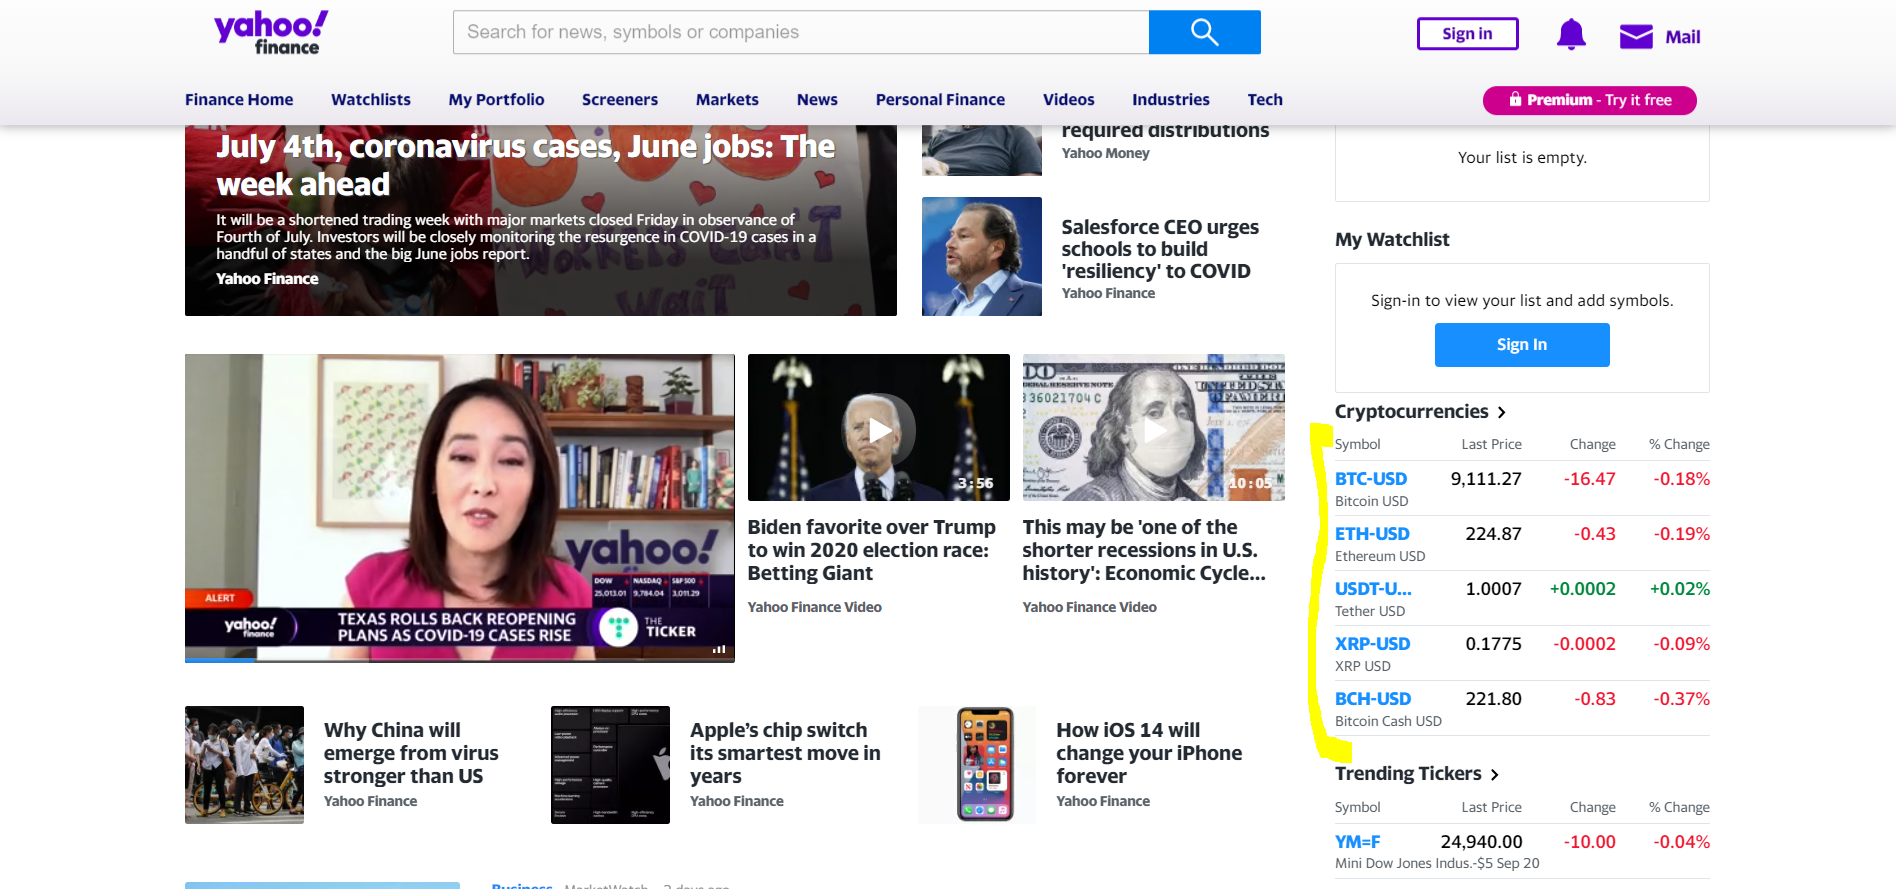

In [31]:
Image('img/yahoo.png')

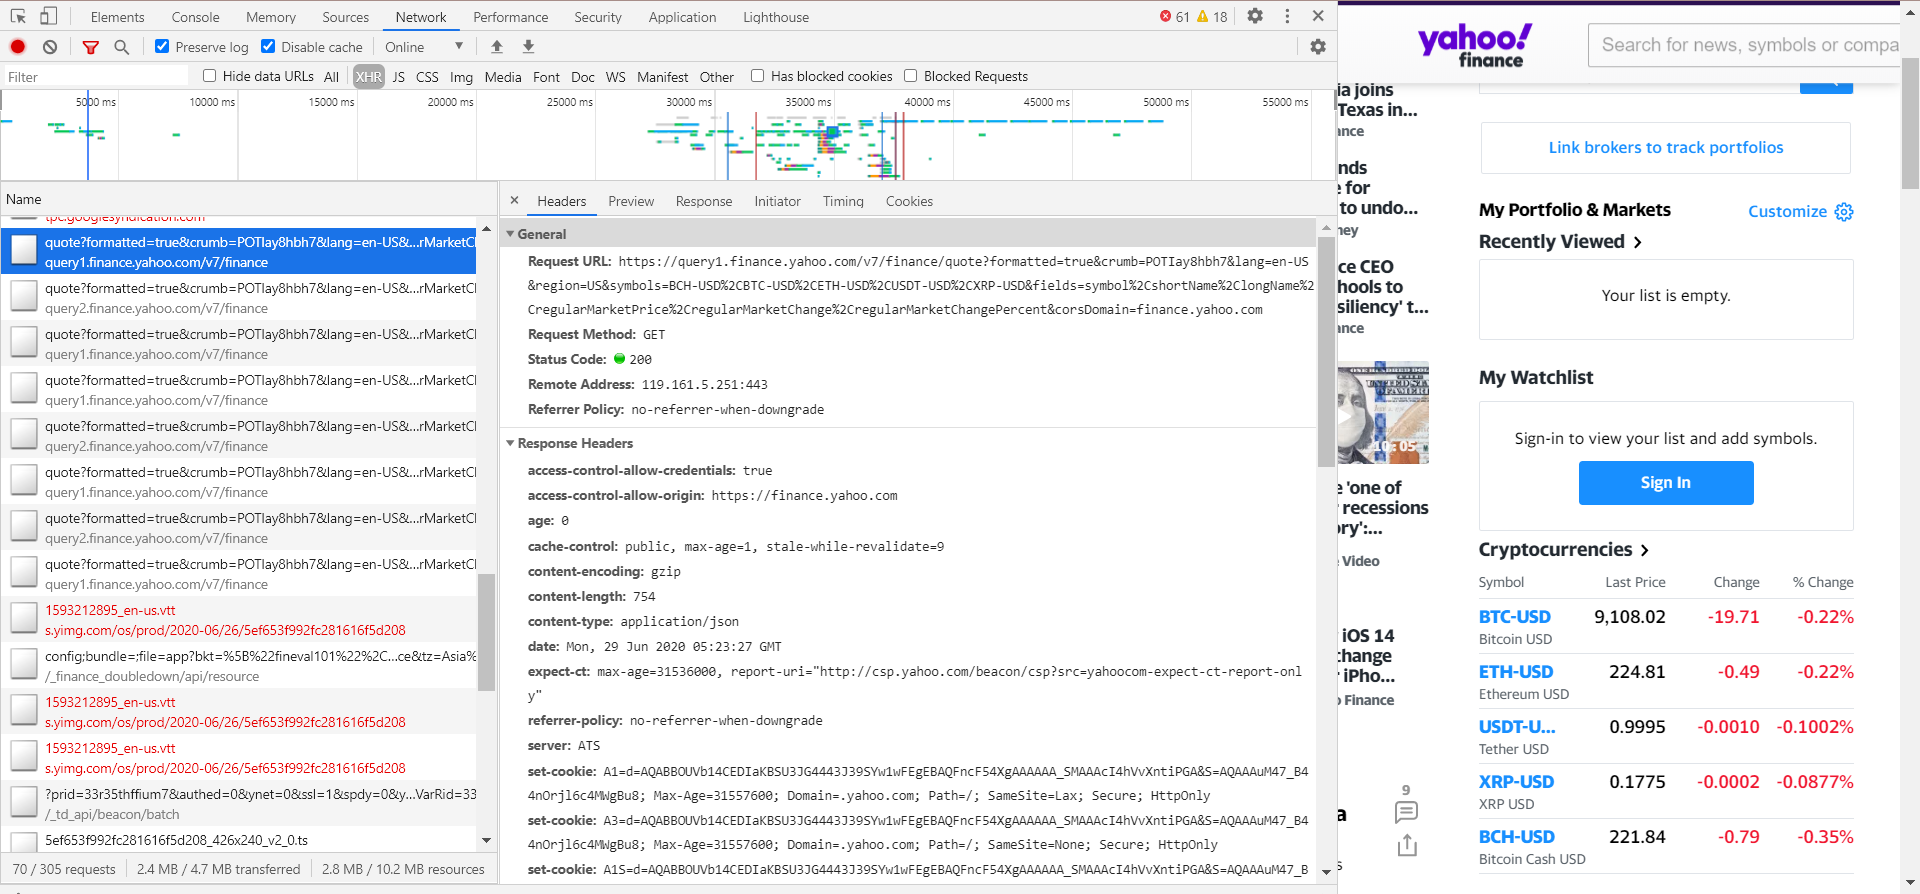

In [32]:
Image('img/yahoo2.png')

In [19]:
import json
import urllib.request as req
from fake_useragent import UserAgent


# Fake Header 정보(가상으로 User-Agent 생성)
ua = UserAgent()

# 헤더 선언
headers = {
    'User-Agent': ua.ie,
    'referer': 'https://finance.yahoo.com/'
}

# 다음 주식 요청 URL
url = "https://query1.finance.yahoo.com/v7/finance/quote?formatted=true&crumb=POTIay8hbh7&lang=en-US&region=US&symbols=BCH-USD%2CBTC-USD%2CETH-USD%2CUSDT-USD%2CXRP-USD&fields=symbol%2CshortName%2ClongName%2CregularMarketPrice%2CregularMarketChange%2CregularMarketChangePercent&corsDomain=finance.yahoo.com"


res = req.urlopen(req.Request(url, headers=headers)).read().decode('utf-8')

# 응답 데이터 str -> json 변환 및 data 값 저장
_json_data = json.loads(res)


print( _json_data, '\n')


{'quoteResponse': {'result': [{'exchangeTimezoneName': 'Europe/London', 'fullExchangeName': 'CCC', 'symbol': 'BCH-USD', 'regularMarketChange': {'raw': 0.678833, 'fmt': '0.68'}, 'gmtOffSetMilliseconds': 3600000, 'exchangeDataDelayedBy': 0, 'firstTradeDateMilliseconds': 1500764400000, 'language': 'en-US', 'regularMarketTime': {'raw': 1593676279, 'fmt': '8:51AM BST'}, 'exchangeTimezoneShortName': 'BST', 'regularMarketChangePercent': {'raw': 0.30345306, 'fmt': '0.30%'}, 'quoteType': 'CRYPTOCURRENCY', 'marketState': 'REGULAR', 'regularMarketPrice': {'raw': 224.38164, 'fmt': '224.38'}, 'market': 'ccc_market', 'quoteSourceName': 'CryptoCompare', 'tradeable': False, 'exchange': 'CCC', 'sourceInterval': 15, 'region': 'US', 'shortName': 'Bitcoin Cash USD', 'regularMarketPreviousClose': {'raw': 223.7028, 'fmt': '223.70'}, 'triggerable': True}, {'exchangeTimezoneName': 'Europe/London', 'fullExchangeName': 'CCC', 'symbol': 'BTC-USD', 'regularMarketChange': {'raw': -4.201172, 'fmt': '-4.20'}, 'gmtOf

In [20]:
data_list=_json_data['quoteResponse']['result']

In [21]:
from pprint import pprint

In [22]:
pprint(data_list)

[{'exchange': 'CCC',
  'exchangeDataDelayedBy': 0,
  'exchangeTimezoneName': 'Europe/London',
  'exchangeTimezoneShortName': 'BST',
  'firstTradeDateMilliseconds': 1500764400000,
  'fullExchangeName': 'CCC',
  'gmtOffSetMilliseconds': 3600000,
  'language': 'en-US',
  'market': 'ccc_market',
  'marketState': 'REGULAR',
  'quoteSourceName': 'CryptoCompare',
  'quoteType': 'CRYPTOCURRENCY',
  'region': 'US',
  'regularMarketChange': {'fmt': '0.68', 'raw': 0.678833},
  'regularMarketChangePercent': {'fmt': '0.30%', 'raw': 0.30345306},
  'regularMarketPreviousClose': {'fmt': '223.70', 'raw': 223.7028},
  'regularMarketPrice': {'fmt': '224.38', 'raw': 224.38164},
  'regularMarketTime': {'fmt': '8:51AM BST', 'raw': 1593676279},
  'shortName': 'Bitcoin Cash USD',
  'sourceInterval': 15,
  'symbol': 'BCH-USD',
  'tradeable': False,
  'triggerable': True},
 {'exchange': 'CCC',
  'exchangeDataDelayedBy': 0,
  'exchangeTimezoneName': 'Europe/London',
  'exchangeTimezoneShortName': 'BST',
  'first

In [23]:
result_list = []
for data in data_list:
    _set={}
    _set['symbol'] = data['symbol']
    _set['Last_price'] = data['regularMarketPrice']['fmt']
    _set['Change'] = data['regularMarketChange']['fmt']
    _set['%Change'] = data['regularMarketChangePercent']['fmt']
    result_list.append(_set)

In [24]:
import pandas as pd
df = pd.DataFrame(result_list)

In [25]:
df

,symbol,Last_price,Change,%Change
0,BCH-USD,224.38,0.68,0.30%
1,BTC-USD,"9,224.03",-4.20,-0.05%
2,ETH-USD,229.95,-1.47,-0.64%
3,USDT-USD,1.0029,0.0022,0.22%
4,XRP-USD,0.1772,0.0003,0.19%
